In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/winequality-red.csv"
df = pd.read_csv(file_path)

print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "/content/drive/My Drive/winequality-red.csv"
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
# Create a binary target variable for wine quality (good/bad)
data['good_wine'] = data['quality'].apply(lambda q: 'good' if q > 6.5 else 'bad')

In [ ]:
# Compute quality distribution
quality_distribution = data['good_wine'].value_counts().reset_index()
quality_distribution.columns = ['category', 'count']

In [ ]:
# Compute original quality distribution
original_quality_dist = data['quality'].value_counts().reset_index()
original_quality_dist.columns = ['quality', 'count']
original_quality_dist = original_quality_dist.sort_values(by='quality')

In [ ]:
# Compute feature means by wine quality
feature_means = data.groupby('good_wine').mean().transpose()
feature_means['difference'] = abs(feature_means['good'] - feature_means['bad'])
feature_means = feature_means.reset_index().rename(columns={'index': 'feature'})

In [ ]:
# Compute feature importance based on relative mean difference
feature_means['importance'] = feature_means['difference'] / ((feature_means['good'] + feature_means['bad']) / 2)
feature_importance = feature_means[['feature', 'importance']].sort_values(by='importance', ascending=False)

<ipython-input-18-7e251e2a02ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quality_distribution, x='category', y='count', palette=['#82ca9d', '#8884d8'])


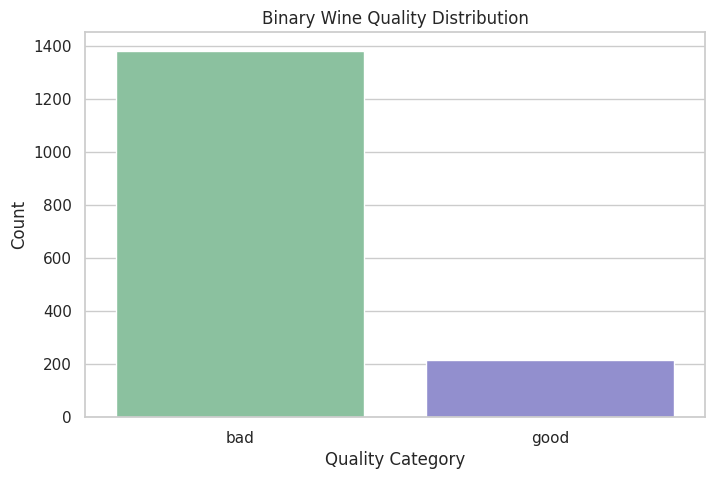

In [ ]:
# Plot quality distribution
plt.figure(figsize=(8, 5))
sns.barplot(data=quality_distribution, x='category', y='count', palette=['#82ca9d', '#8884d8'])
plt.title('Binary Wine Quality Distribution')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.show()

<ipython-input-19-4fc5cdde3356>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=original_quality_dist, x='quality', y='count', palette='viridis')


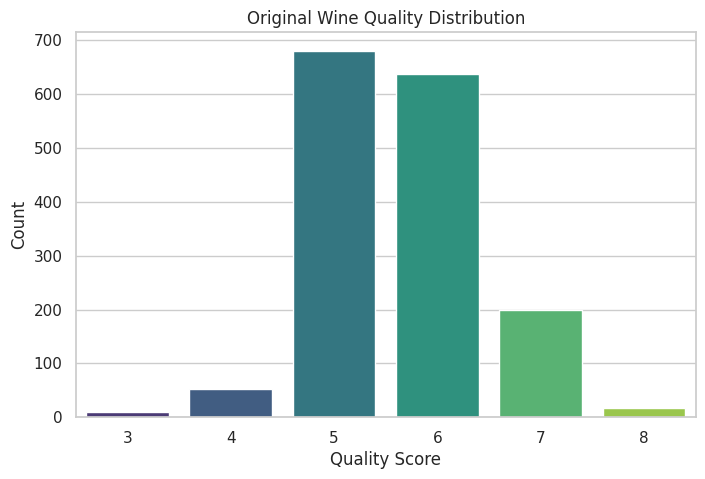

In [ ]:
# Plot original quality distribution
plt.figure(figsize=(8, 5))
sns.barplot(data=original_quality_dist, x='quality', y='count', palette='viridis')
plt.title('Original Wine Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

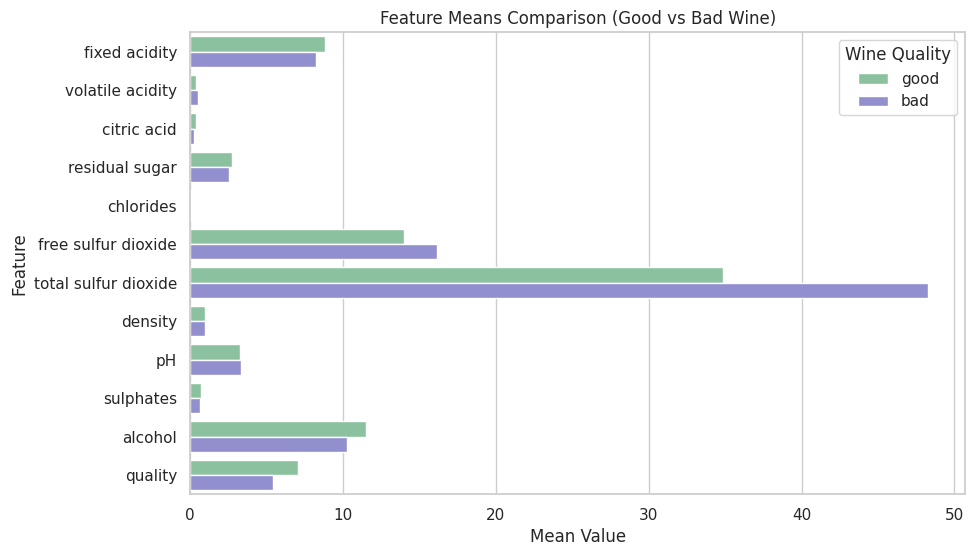

In [ ]:
# Plot feature means comparison
plt.figure(figsize=(10, 6))
feature_means_melted = feature_means.melt(id_vars=['feature'], value_vars=['good', 'bad'], var_name='wine_type', value_name='mean_value')
sns.barplot(data=feature_means_melted, x='mean_value', y='feature', hue='wine_type', palette=['#82ca9d', '#8884d8'])
plt.title('Feature Means Comparison (Good vs Bad Wine)')
plt.xlabel('Mean Value')
plt.ylabel('Feature')
plt.legend(title='Wine Quality')
plt.show()

<ipython-input-21-342096a93629>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(6), x='importance', y='feature', palette='magma')


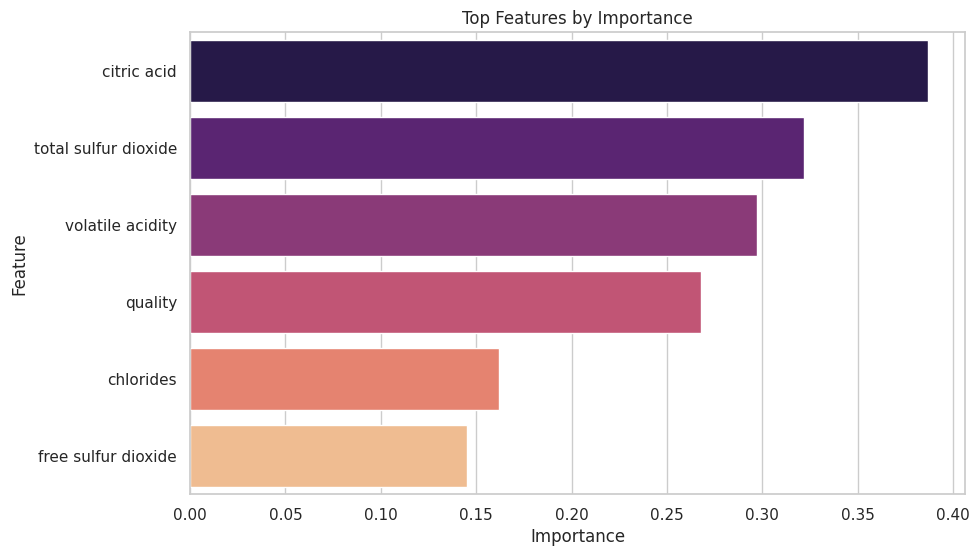

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(6), x='importance', y='feature', palette='magma')
plt.title('Top Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 80.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import sweetviz as sv
from google.colab import drive

In [ ]:
import pandas as pd
import sweetviz as sv

# Load dataset
df = pd.read_csv("/content/drive/My Drive/winequality-red.csv")

# Ensure target column is numeric
df["quality"] = pd.to_numeric(df["quality"], errors="coerce")

# Force Sweetviz to treat "quality" as numeric
feature_config = sv.FeatureConfig(force_num=["quality"])

# Generate Sweetviz report
report = sv.analyze(df, target_feat="quality", feat_cfg=feature_config)

# Show report
report.show_html("sweetviz_wine_quality.html")


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_wine_quality.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



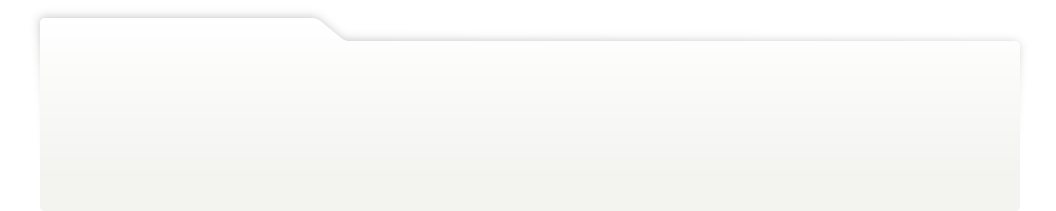
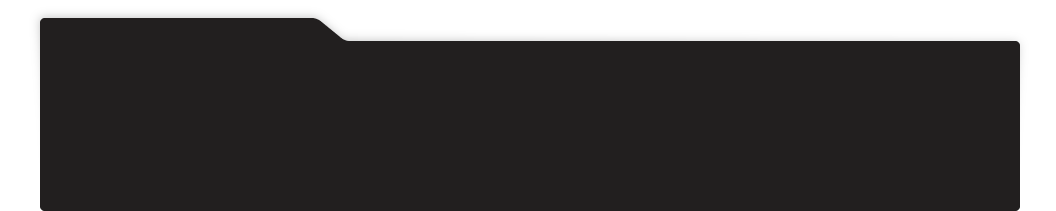
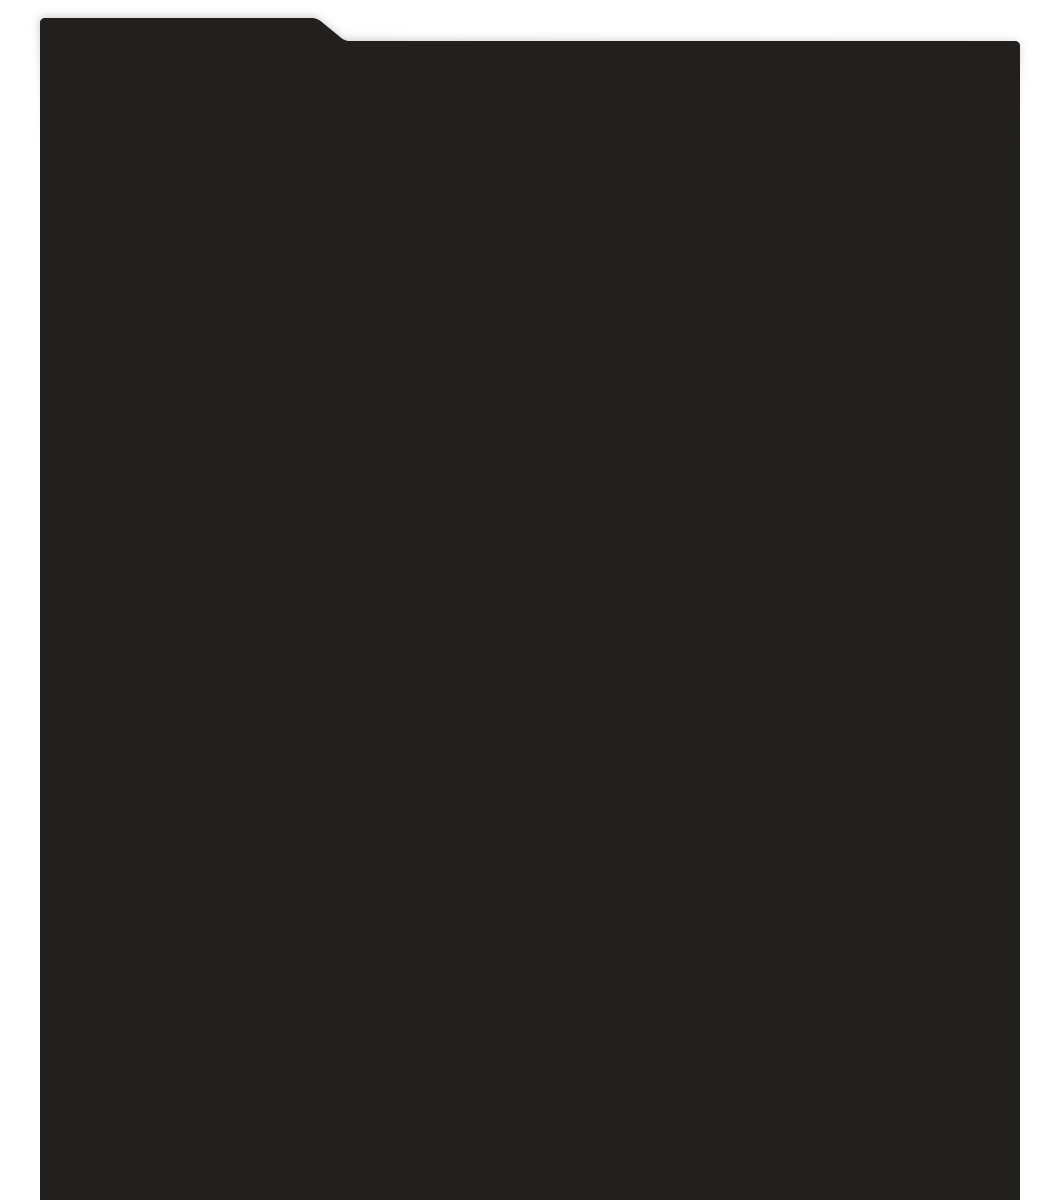
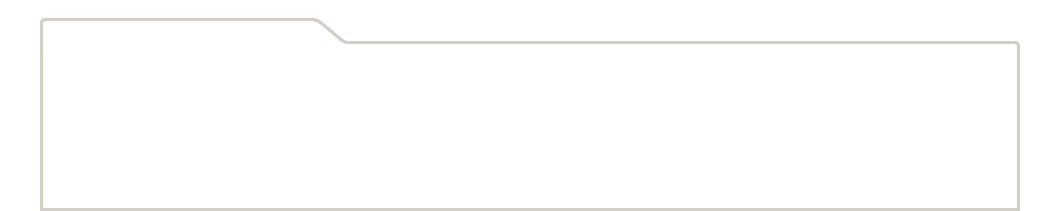
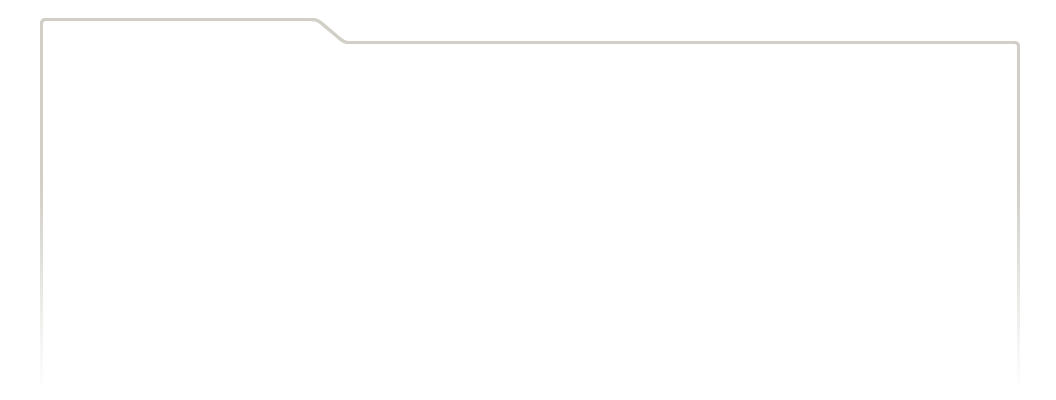
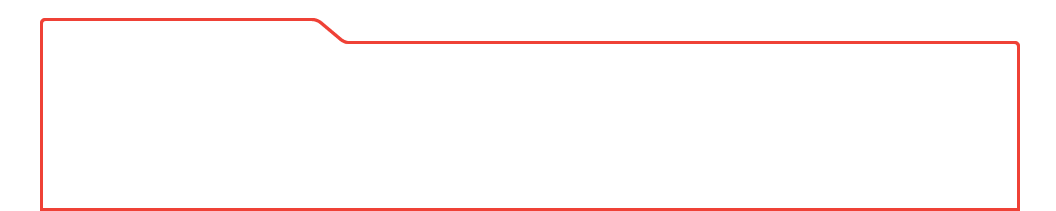
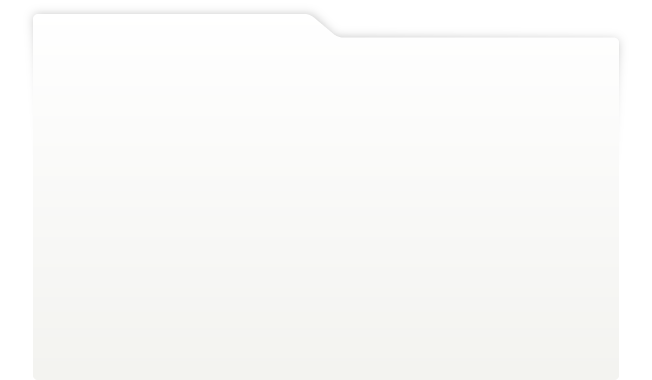
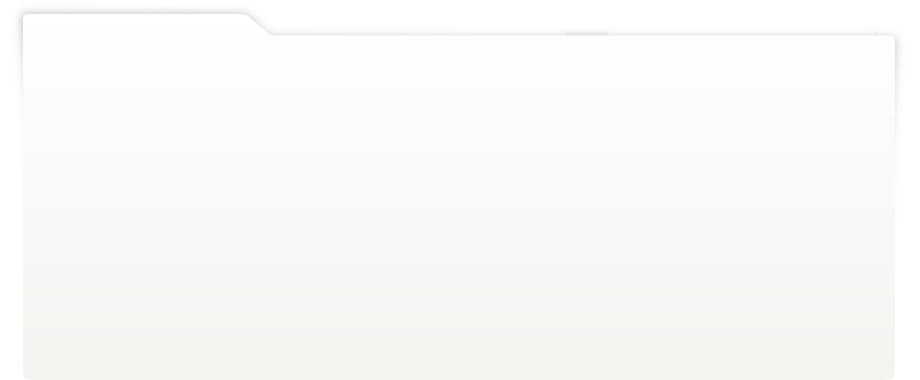
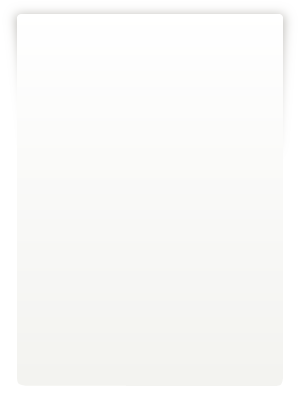
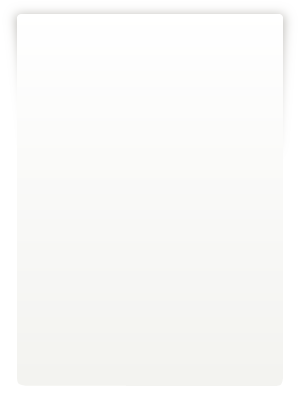
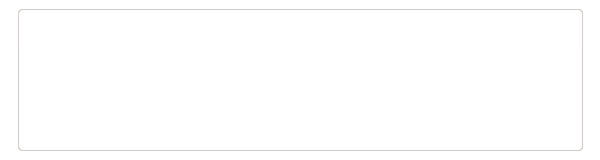
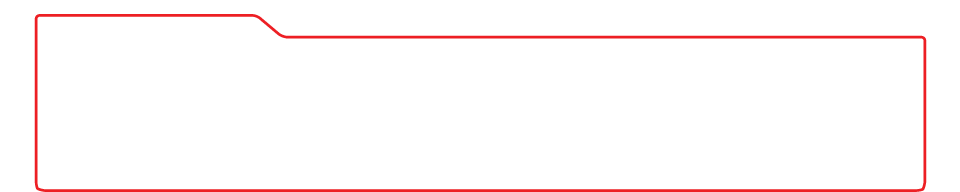
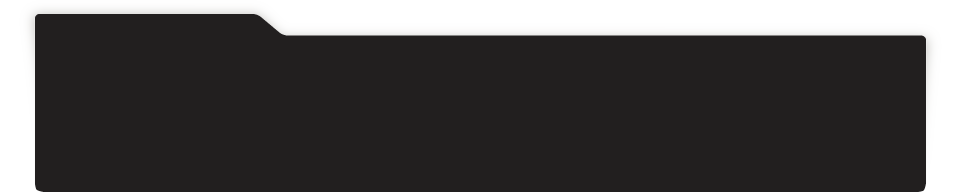
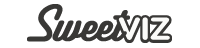
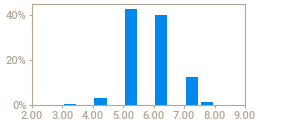
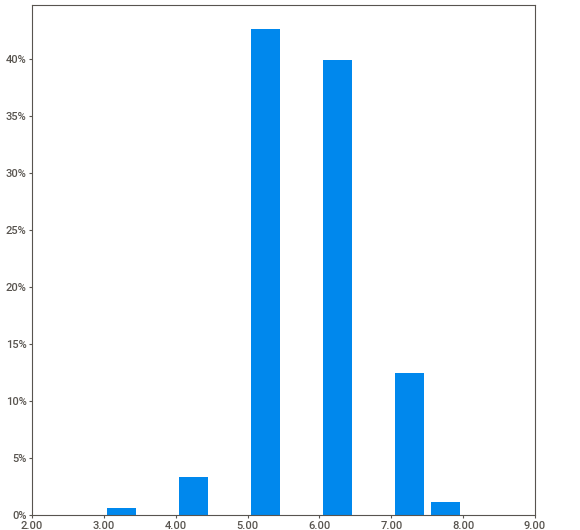
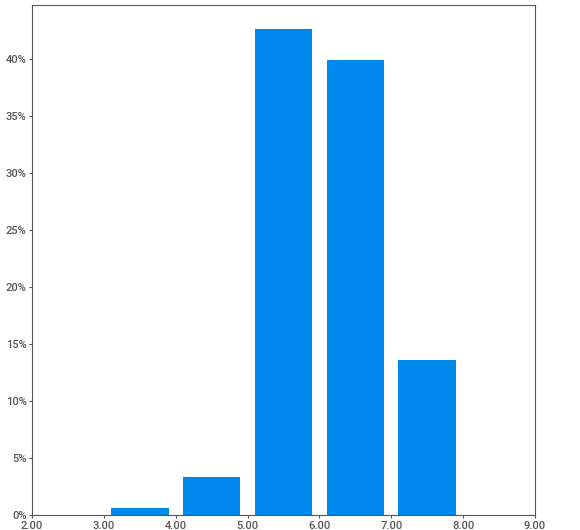
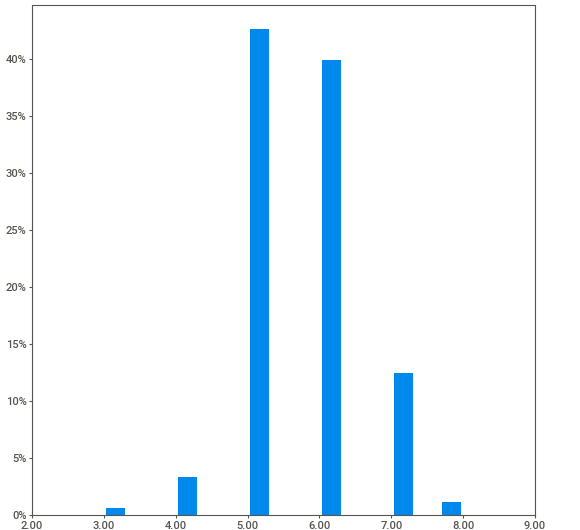
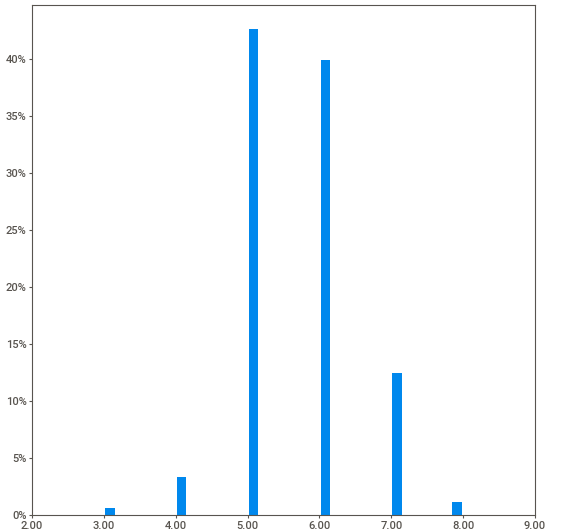
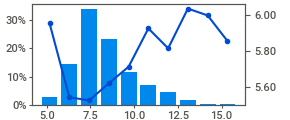
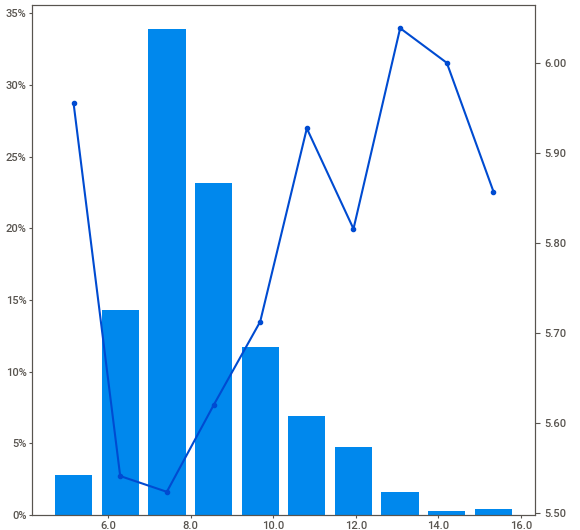
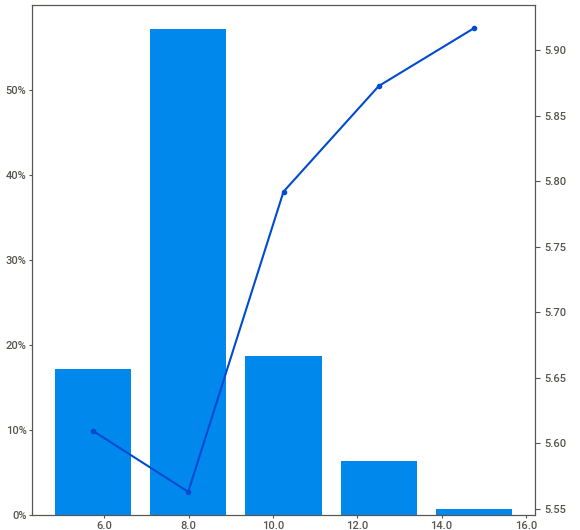
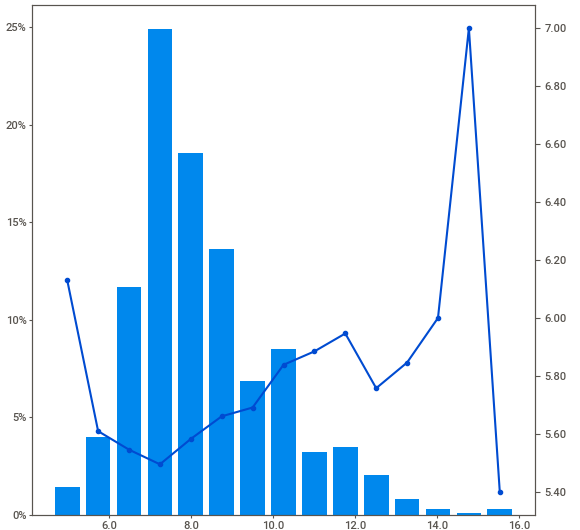
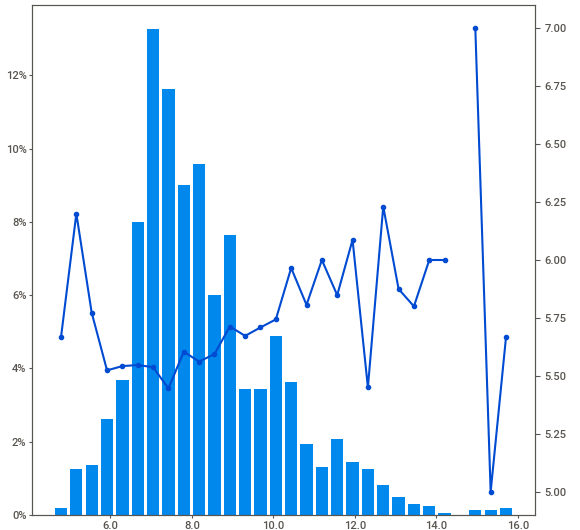
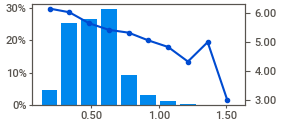
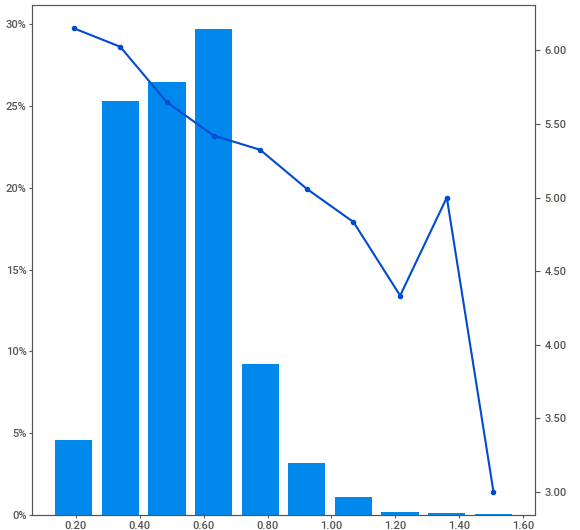
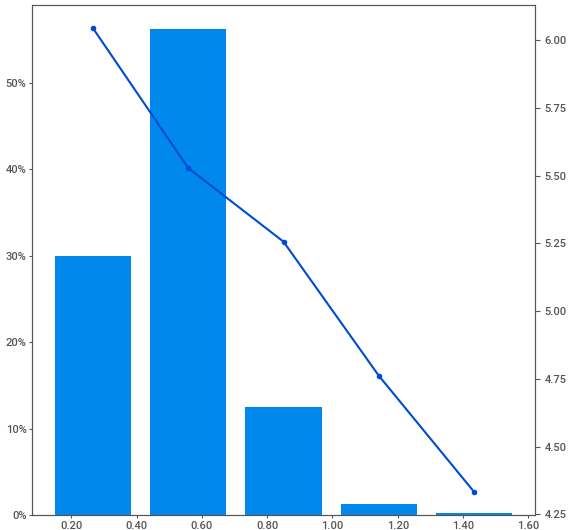
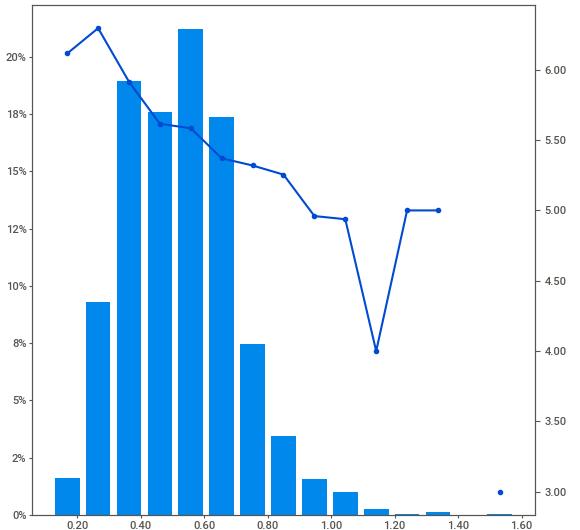
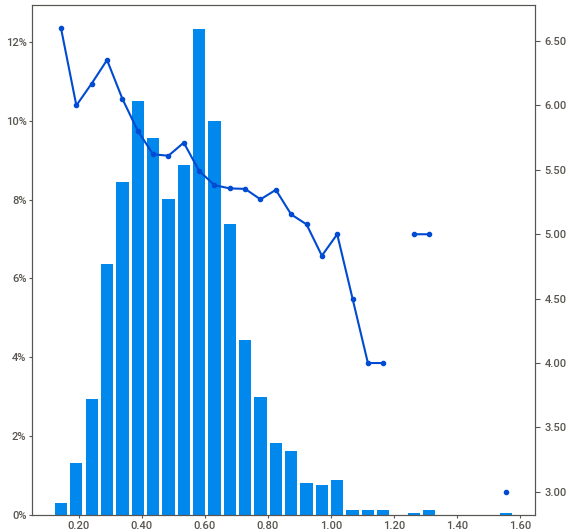
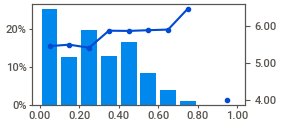
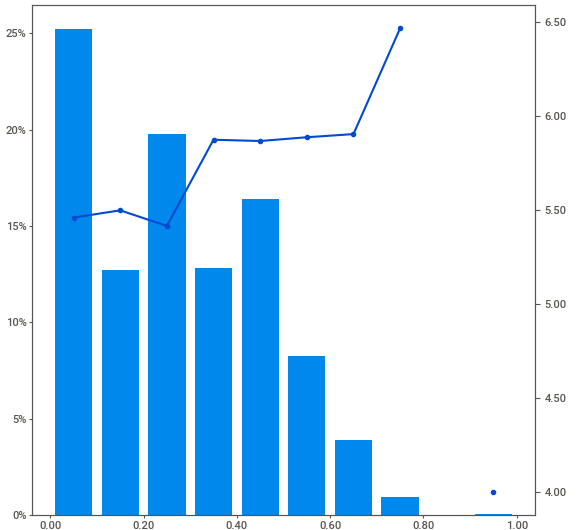
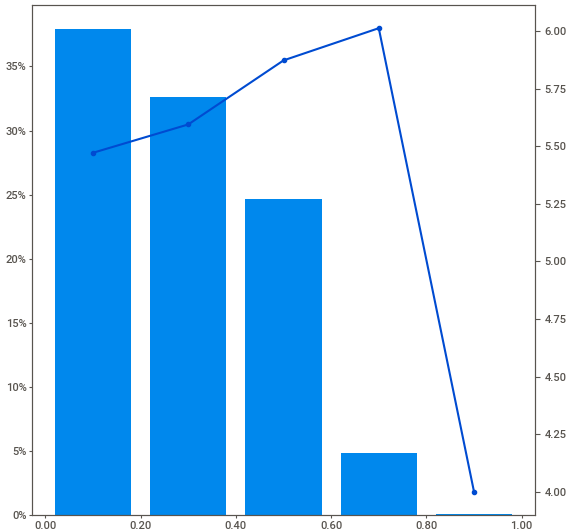
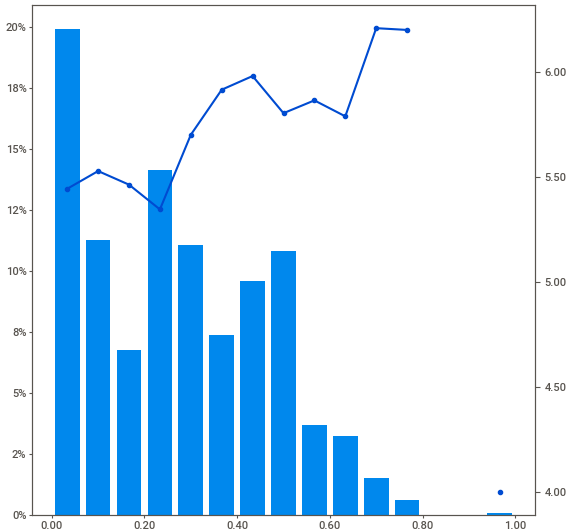
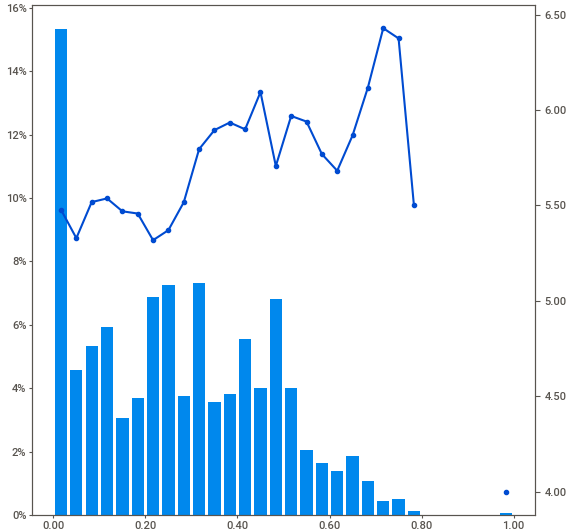
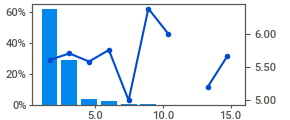
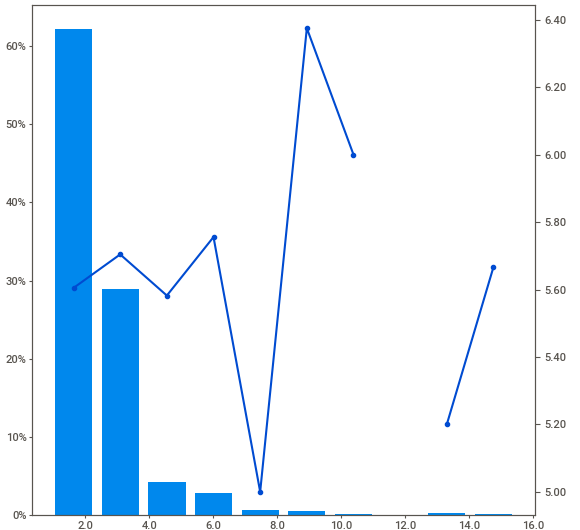
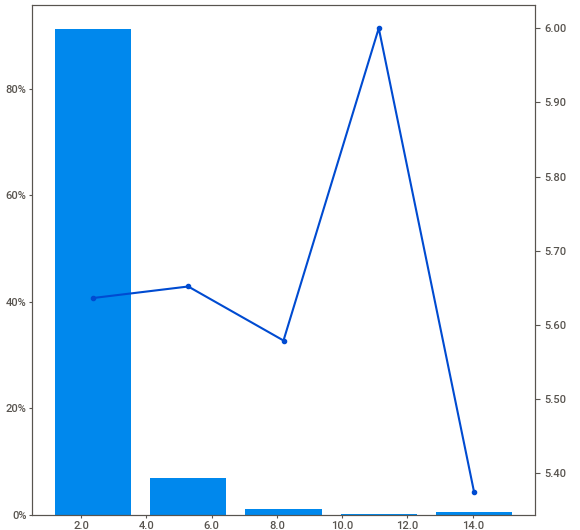
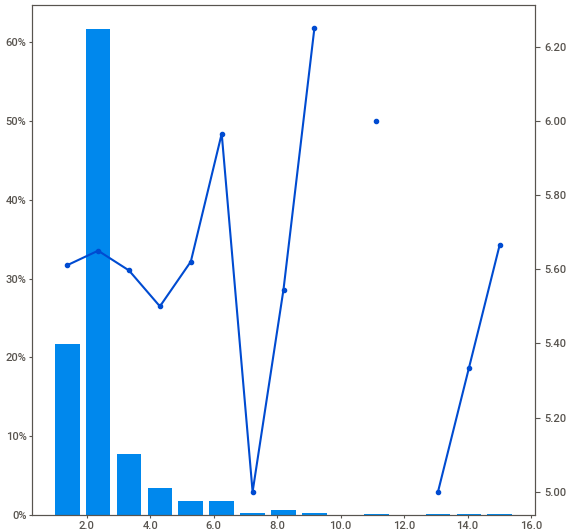
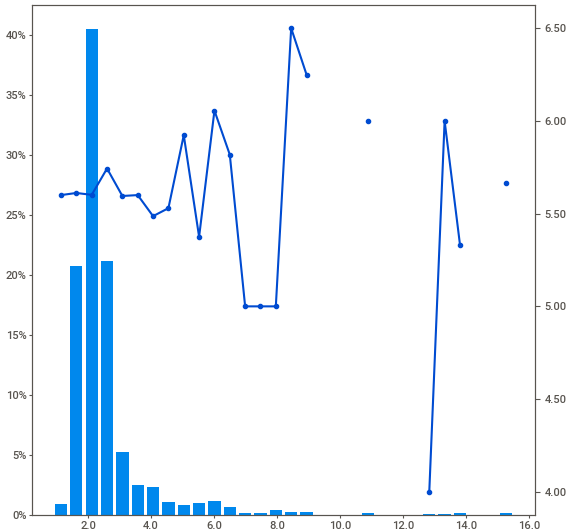
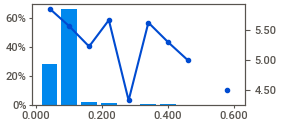
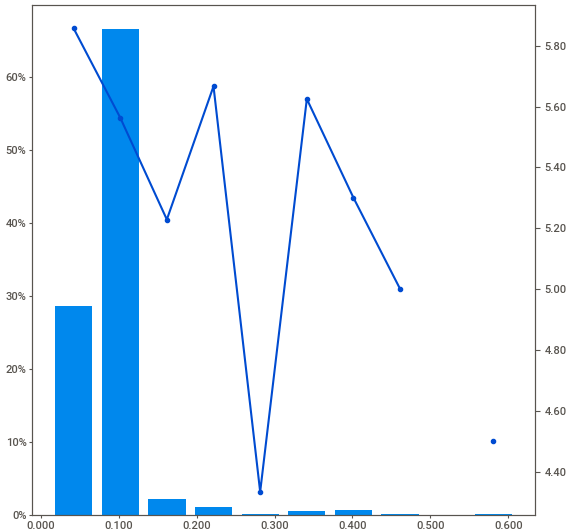
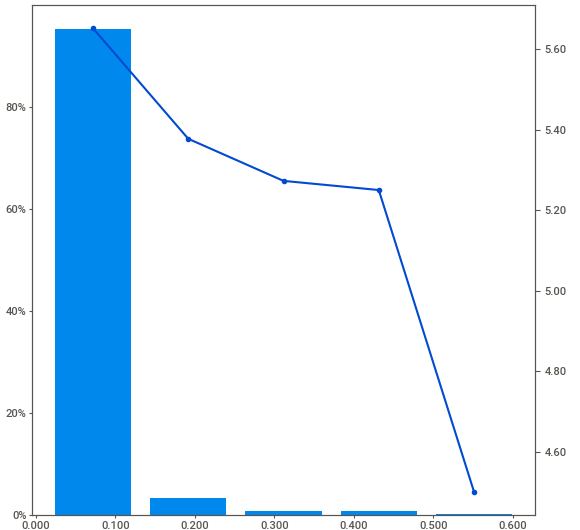
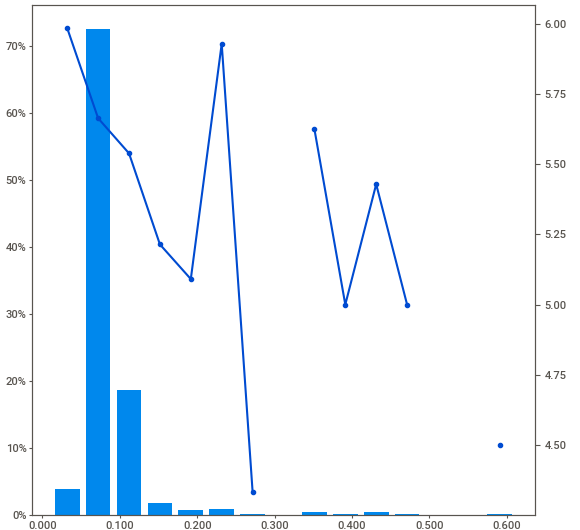
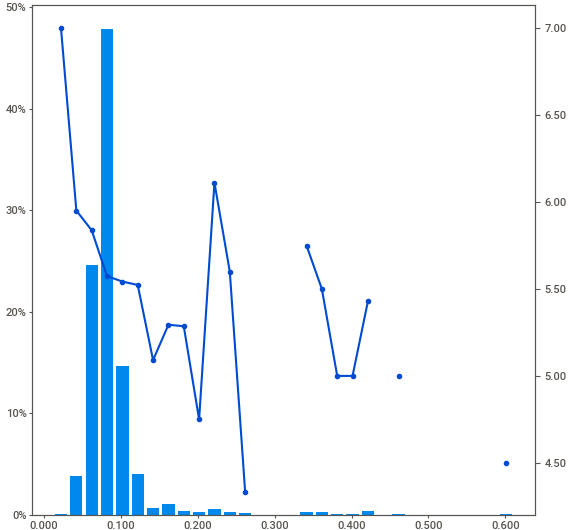
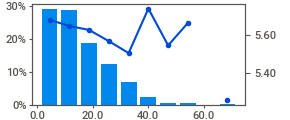
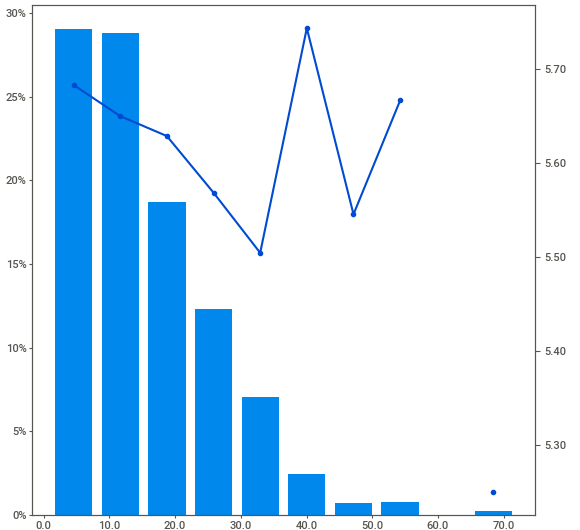
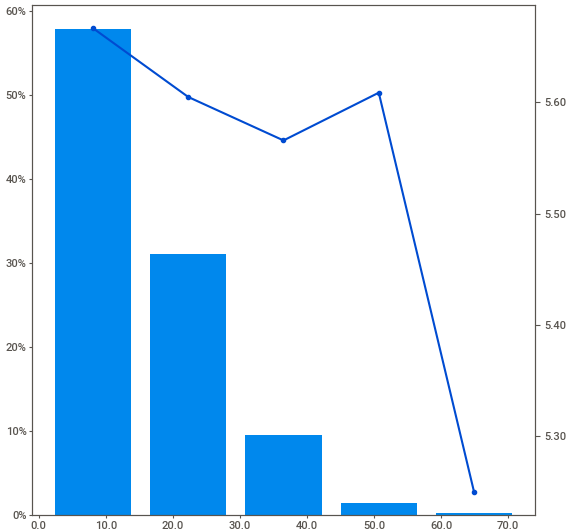
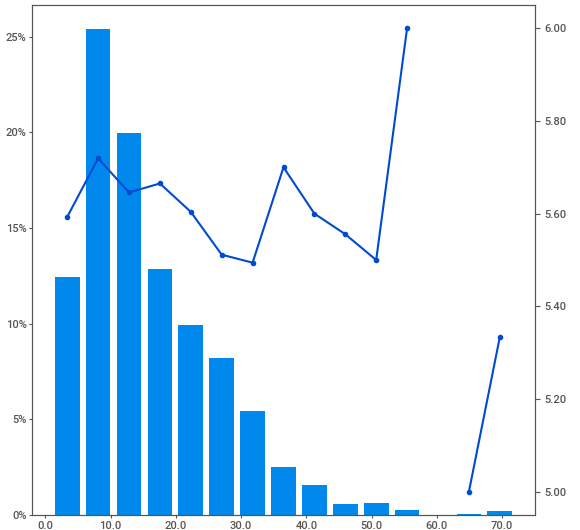
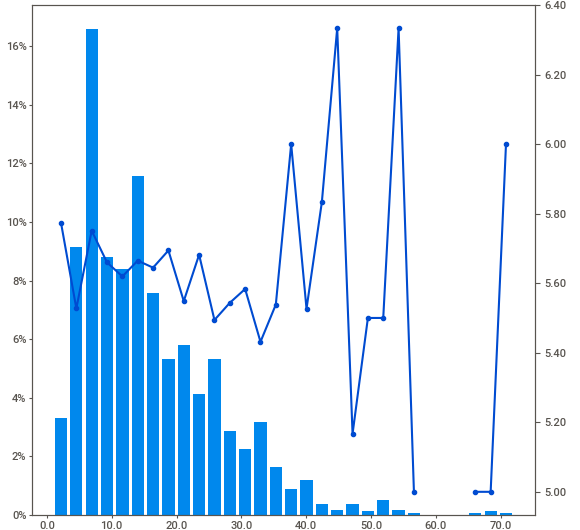
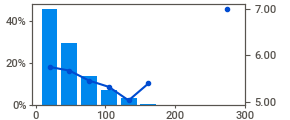
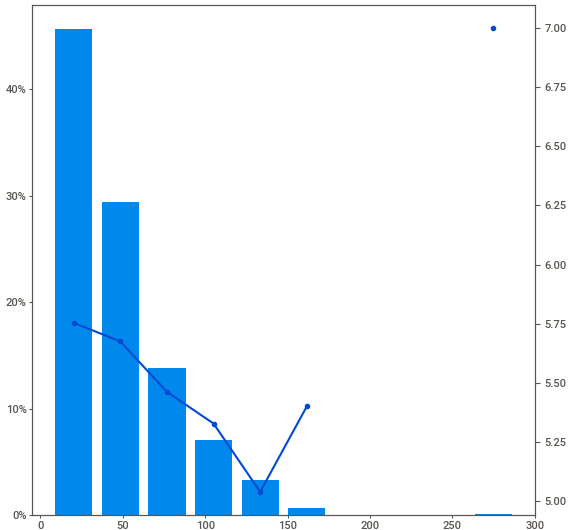
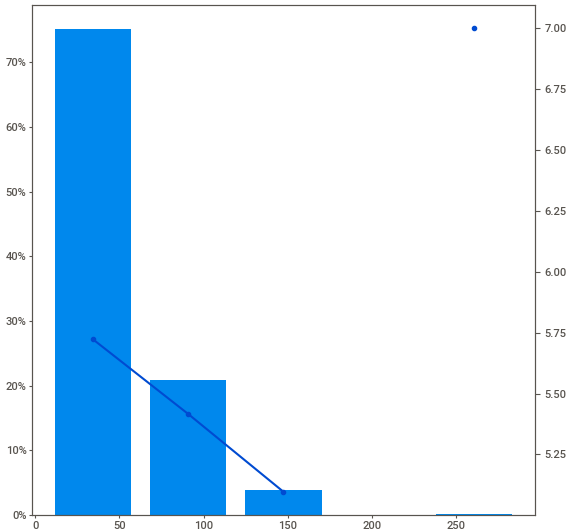
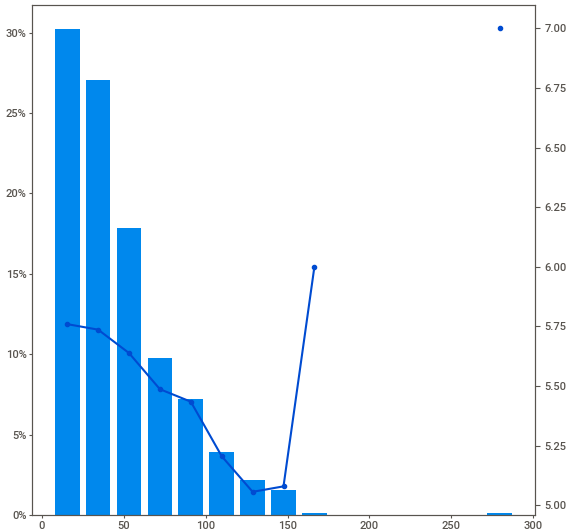
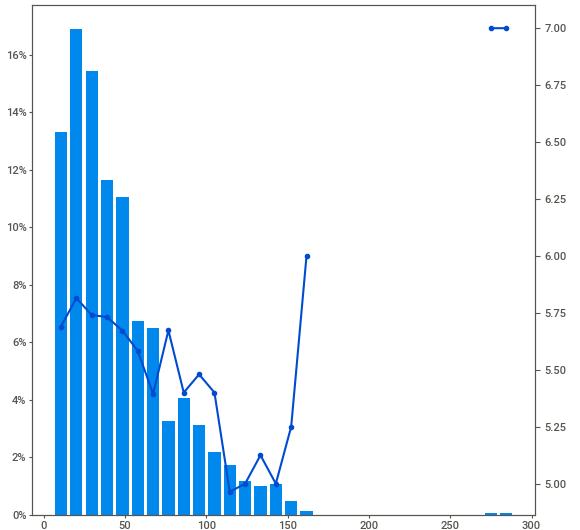
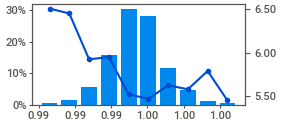
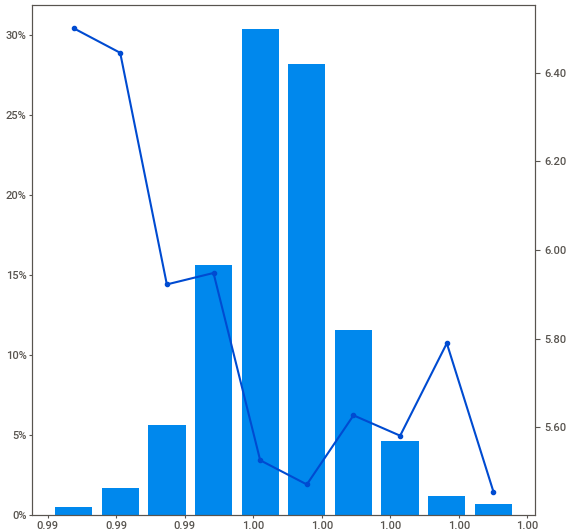
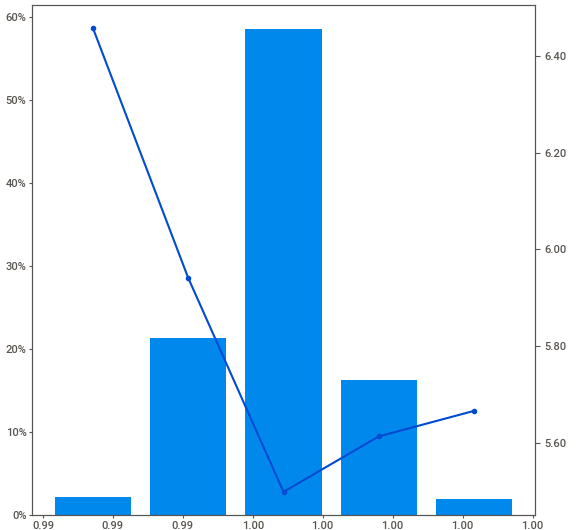
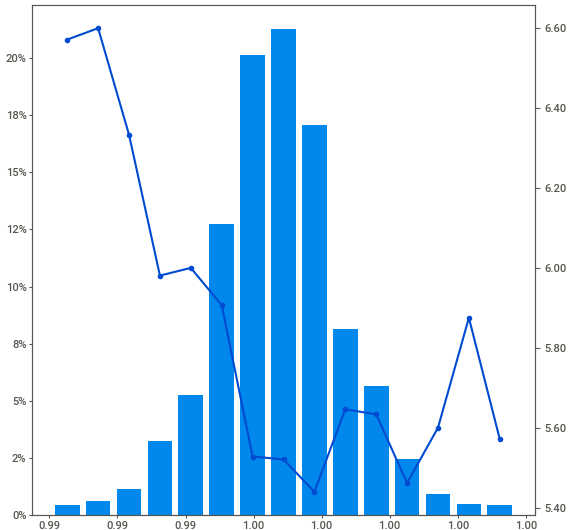
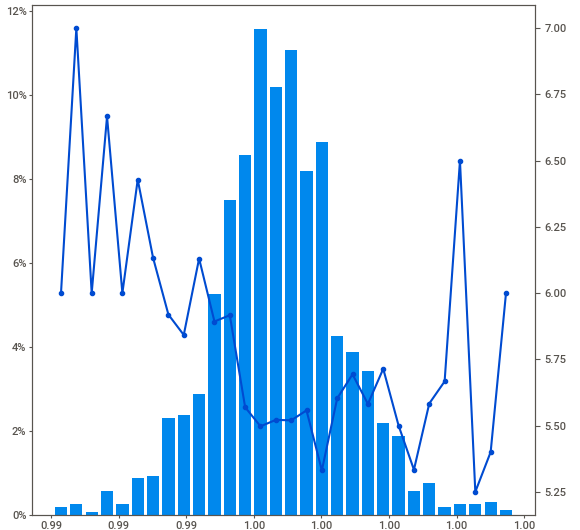
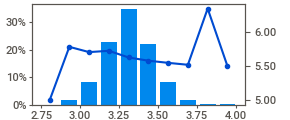
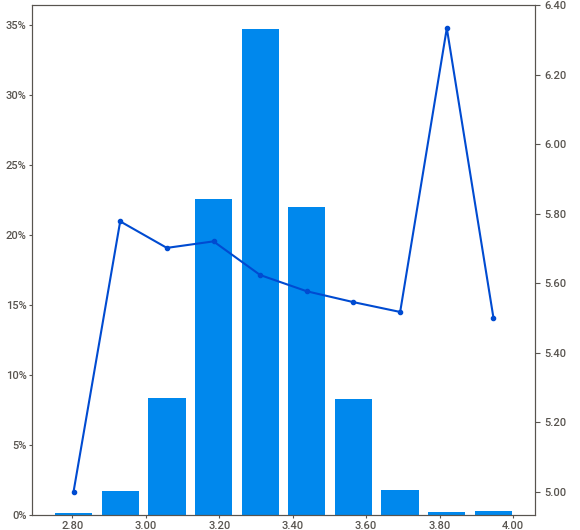
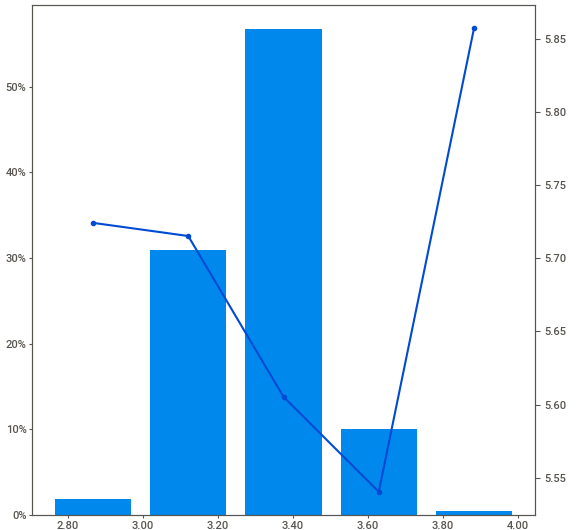
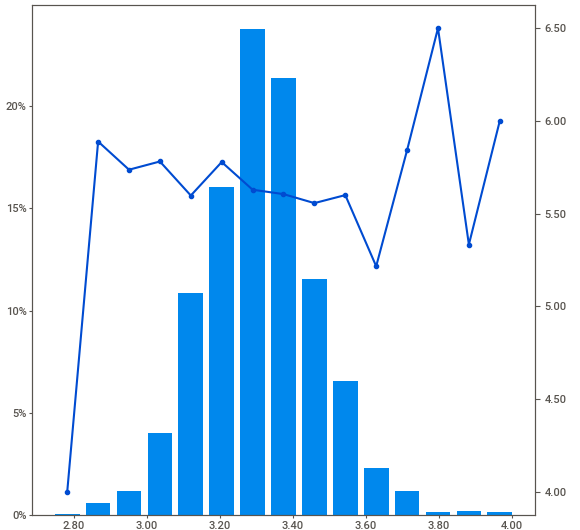
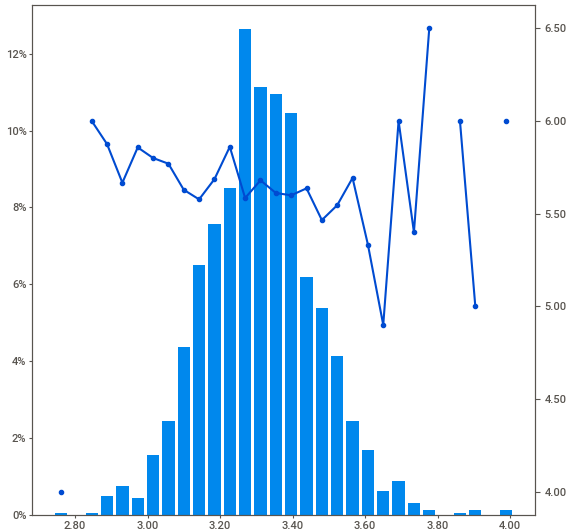
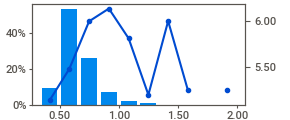
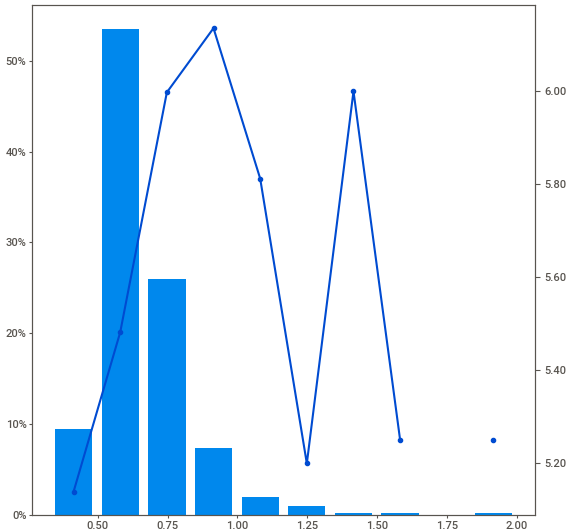
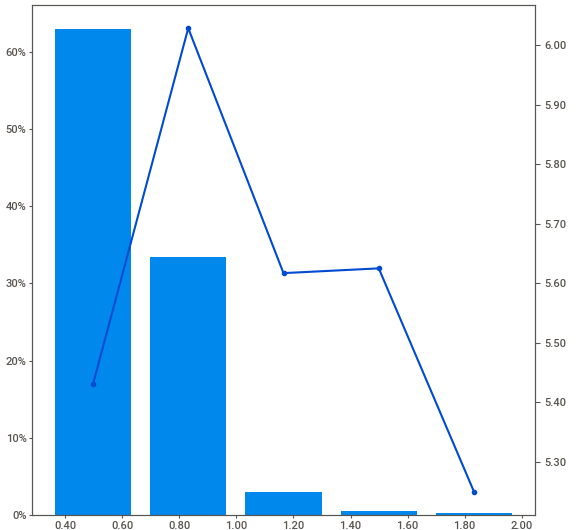
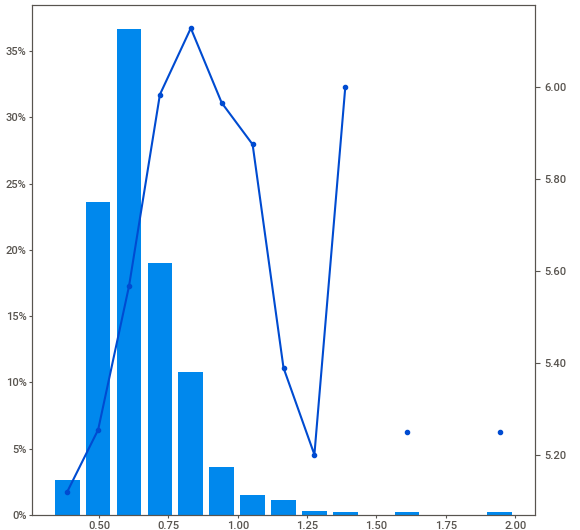
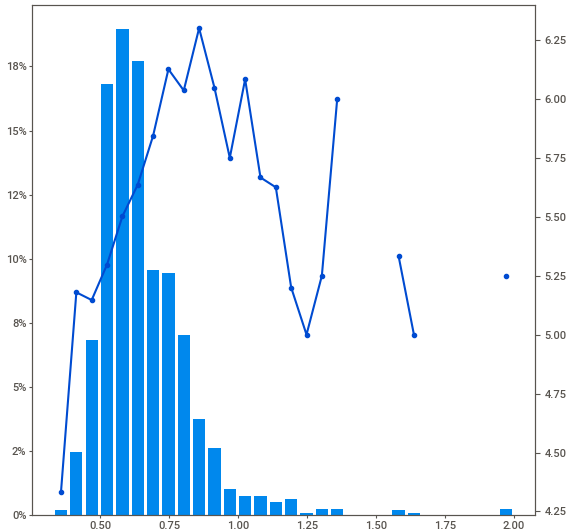
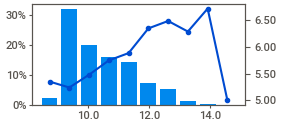
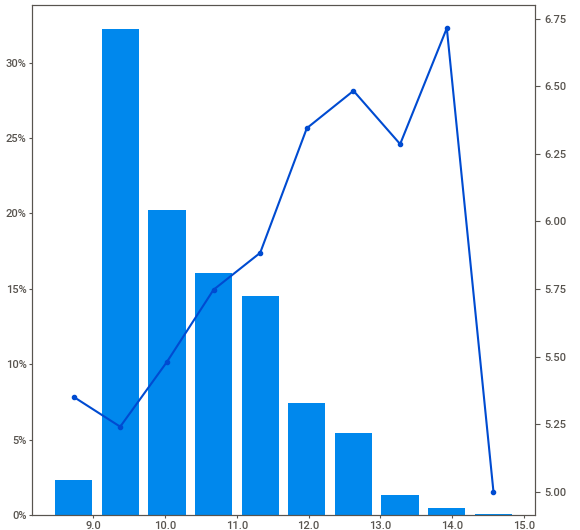
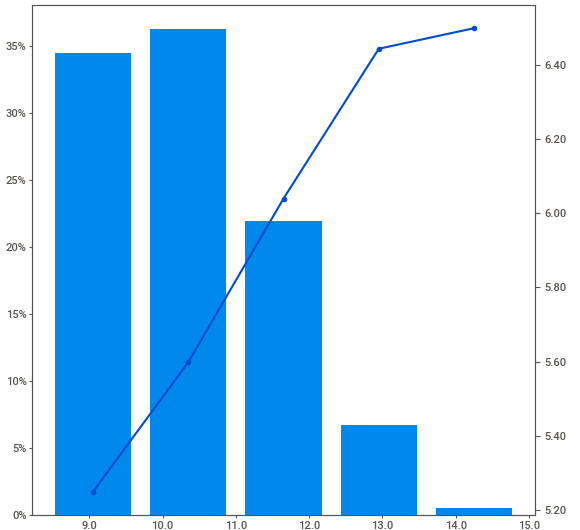
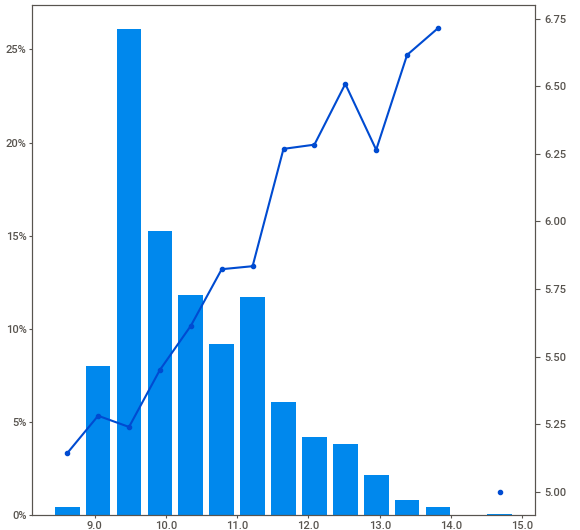
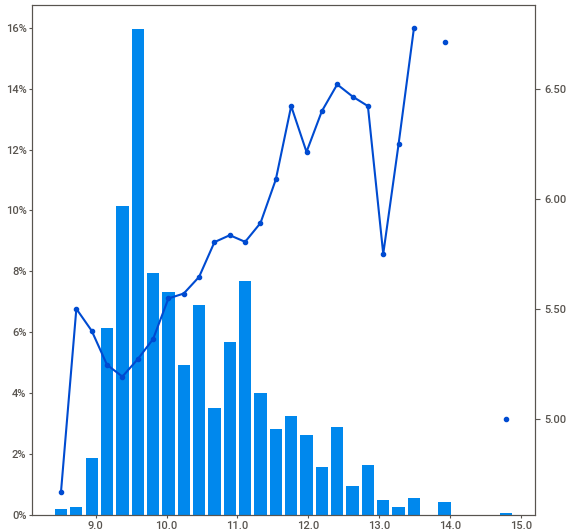
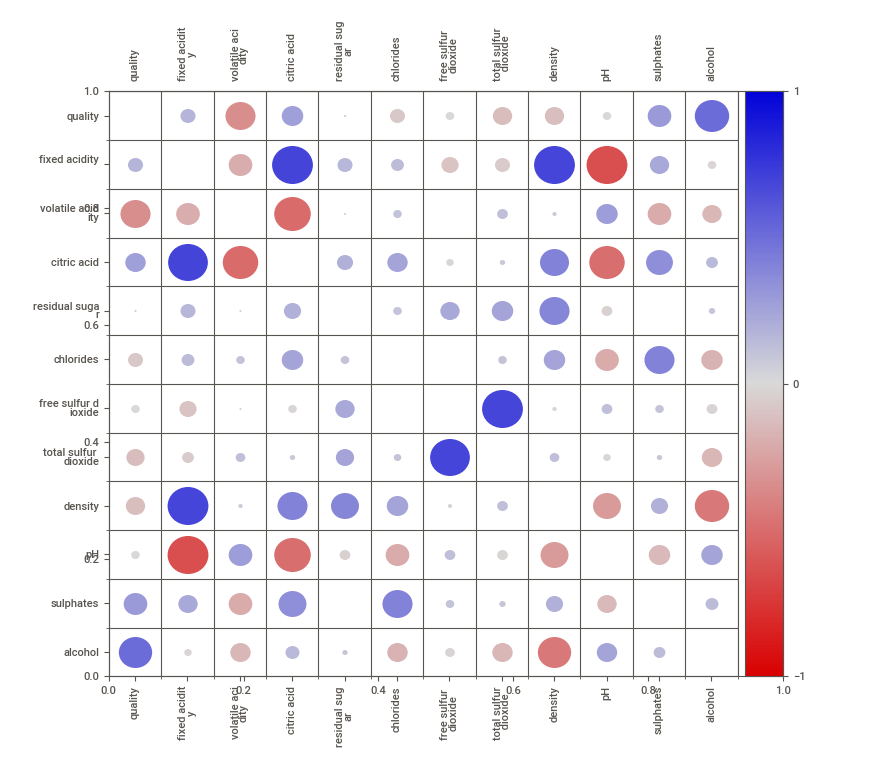
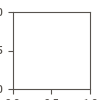

In [ ]:
import sweetviz as sv
from IPython.core.display import display, HTML

# Display the report in Colab
display(HTML("sweetviz_wine_quality.html"))


In [ ]:
from google.colab import files
files.download("sweetviz_wine_quality.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-11-003e91a73a56>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["quality_binary"], palette="viridis")
<ipython-input-11-003e91a73a56>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality_binary", y="alcohol", data=df, palette="coolwarm")


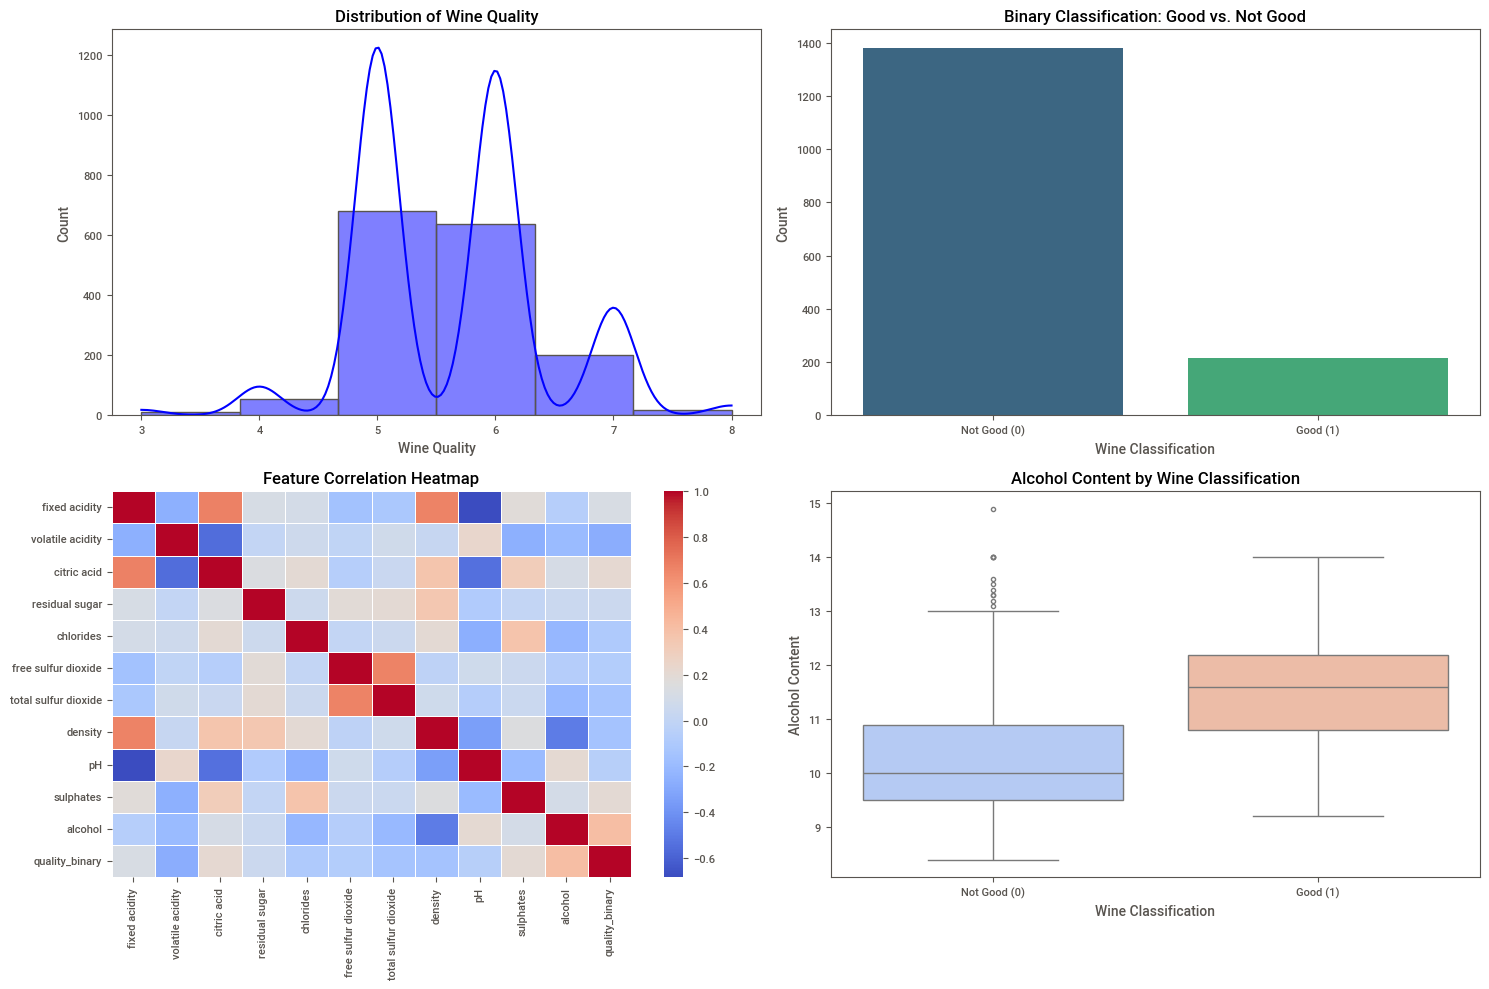

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert quality into binary classification (good = 1 if quality > 6.5, else 0)
df["quality_binary"] = (df["quality"] > 6.5).astype(int)

# Set up the figure layout
plt.figure(figsize=(15, 10))

# Histogram of wine quality distribution
plt.subplot(2, 2, 1)
sns.histplot(df["quality"], bins=6, kde=True, color="blue")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality")

# Bar chart of "good" vs. "not good" wines
plt.subplot(2, 2, 2)
sns.countplot(x=df["quality_binary"], palette="viridis")
plt.xticks([0, 1], ["Not Good (0)", "Good (1)"])
plt.xlabel("Wine Classification")
plt.ylabel("Count")
plt.title("Binary Classification: Good vs. Not Good")

# Correlation heatmap
plt.subplot(2, 2, 3)
corr_matrix = df.drop(columns=["quality"]).corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")

# Boxplot of key features by wine quality classification
plt.subplot(2, 2, 4)
sns.boxplot(x="quality_binary", y="alcohol", data=df, palette="coolwarm")
plt.xticks([0, 1], ["Not Good (0)", "Good (1)"])
plt.xlabel("Wine Classification")
plt.ylabel("Alcohol Content")
plt.title("Alcohol Content by Wine Classification")

# Show plots
plt.tight_layout()
plt.show()


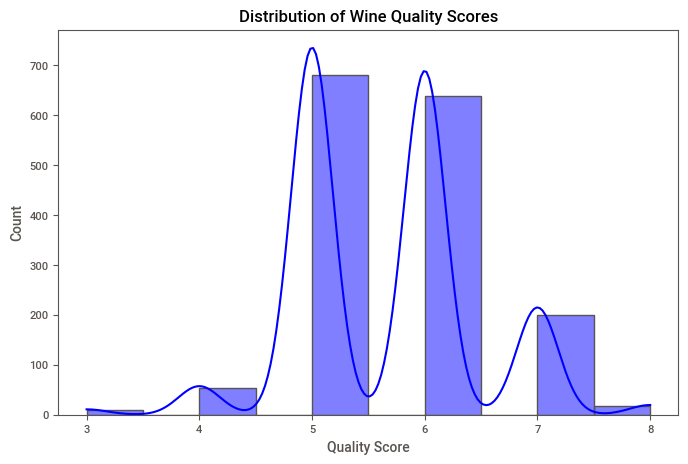

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of wine quality scores
plt.figure(figsize=(8, 5))
sns.histplot(df['quality'], bins=10, kde=True, color="blue")
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()


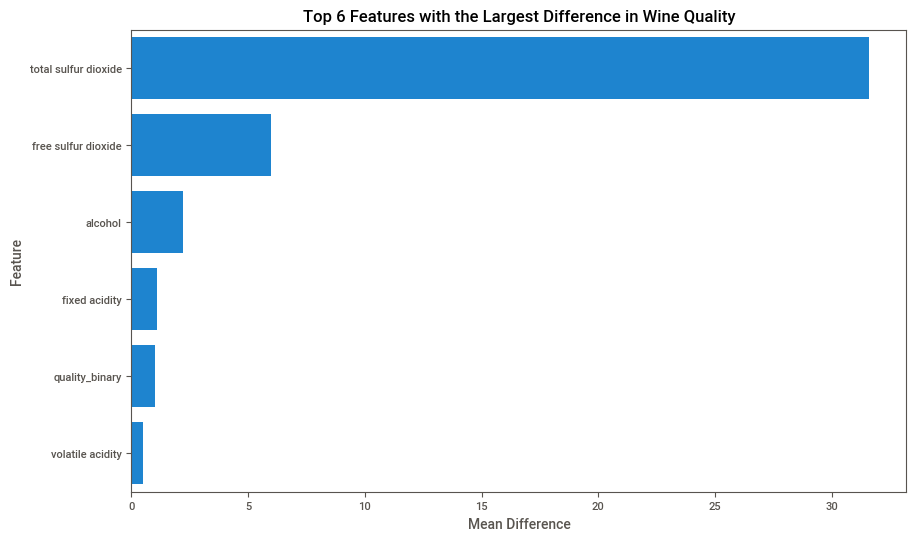

In [ ]:
# Compute mean differences
feature_means = df.groupby('quality').mean().transpose()
feature_means['difference'] = feature_means.max(axis=1) - feature_means.min(axis=1)

# Plot top features with the biggest difference
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_means['difference'].sort_values(ascending=False).head(6),
            y=feature_means.sort_values(by='difference', ascending=False).head(6).index)
plt.title("Top 6 Features with the Largest Difference in Wine Quality")
plt.xlabel("Mean Difference")
plt.ylabel("Feature")
plt.show()


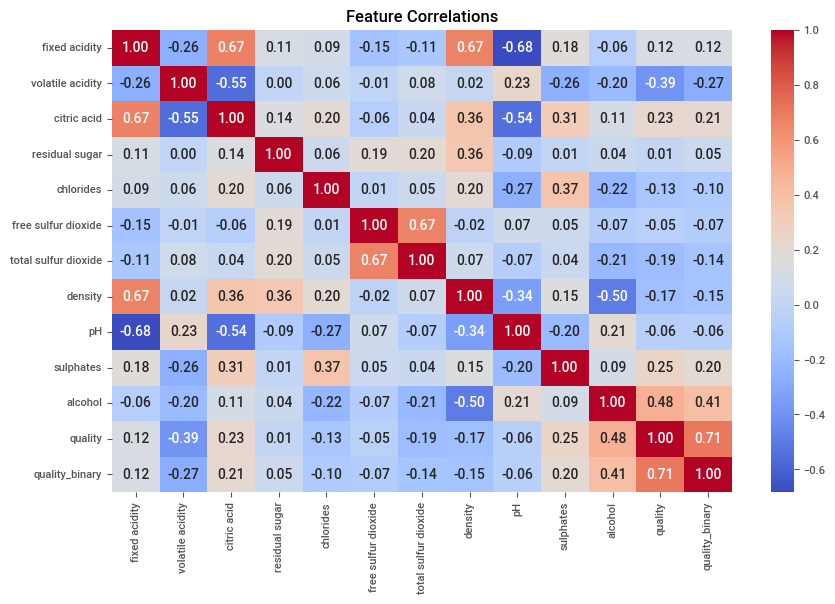

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()


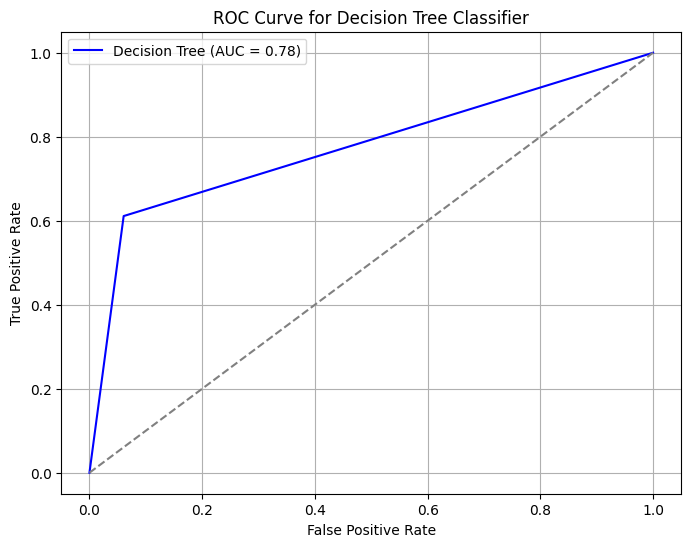

AUC Score: 0.78


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Load dataset
df = pd.read_csv("/content/drive/My Drive/winequality-red.csv")

# Convert quality into binary classification (Good: quality >= 7, Not Good: quality < 7)
df["quality_binary"] = (df["quality"] >= 7).astype(int)

# Define features and target
X = df.drop(columns=["quality", "quality_binary"])
y = df["quality_binary"]

# Split data (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Train Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predict probabilities for ROC Curve
y_prob = dt_clf.predict_proba(X_test)[:, 1]

# Compute AUC Score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree Classifier")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.2f}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (update the file path as needed)
df = pd.read_csv("/content/drive/My Drive/winequality-red.csv")

# If 'quality_binary' exists from earlier analysis, drop it
if "quality_binary" in df.columns:
    df = df.drop(columns=["quality_binary"])

# Define features (all columns except 'quality') and target ('quality')
X = df.drop(columns=["quality"])
y = df["quality"]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.39002514396395427
R-squared: 0.403180341279623
